Read Data

In [10]:
import pandas as pd

df = pd.read_csv("loan.csv")
print(df.head())
print(df.columns.tolist())

C:\Users\nabil\AppData\Local\Temp\ipykernel_6380\2772969072.py:3: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


   id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.56        84.92     C        C1  ...                            NaN   
1     18.94       777.23     D        D2  ...                            NaN   
2     17.97       180.69     D        D1  ...                            NaN   
3     18.94       146.51     D        D2  ...                            NaN   
4     16.14       731.78     C        C4  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0   

Membuat dataset baru dengan variabel berikut:
'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'home_ownership', 'annual_inc', 'verification_status', 'dti','emp_length', 'loan_status', 'addr_state', 'purpose'

In [11]:
selected_columns = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 
    'int_rate', 'installment', 'grade', 'home_ownership', 
    'annual_inc', 'verification_status', 'dti', 'emp_length', 
    'loan_status', 'addr_state', 'purpose', 'issue_d'
]
df_new = df[selected_columns].copy()
print(df_new.head())

   loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       2500         2500           2500.0   36 months     13.56        84.92   
1      30000        30000          30000.0   60 months     18.94       777.23   
2       5000         5000           5000.0   36 months     17.97       180.69   
3       4000         4000           4000.0   36 months     18.94       146.51   
4      30000        30000          30000.0   60 months     16.14       731.78   

  grade home_ownership  annual_inc verification_status    dti emp_length  \
0     C           RENT     55000.0        Not Verified  18.24  10+ years   
1     D       MORTGAGE     90000.0     Source Verified  26.52  10+ years   
2     D       MORTGAGE     59280.0     Source Verified  10.51    6 years   
3     D       MORTGAGE     92000.0     Source Verified  16.74  10+ years   
4     C       MORTGAGE     57250.0        Not Verified  26.35  10+ years   

  loan_status addr_state             purpose   issue_d  

Melihat info data

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   loan_amnt            int64  
 1   funded_amnt          int64  
 2   funded_amnt_inv      float64
 3   term                 object 
 4   int_rate             float64
 5   installment          float64
 6   grade                object 
 7   home_ownership       object 
 8   annual_inc           float64
 9   verification_status  object 
 10  dti                  float64
 11  emp_length           object 
 12  loan_status          object 
 13  addr_state           object 
 14  purpose              object 
 15  issue_d              object 
dtypes: float64(5), int64(2), object(9)
memory usage: 276.0+ MB


Cek missing value

In [13]:
df_new.isnull().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
home_ownership              0
annual_inc                  4
verification_status         0
dti                      1711
emp_length             146907
loan_status                 0
addr_state                  0
purpose                     0
issue_d                     0
dtype: int64

Mengahus baris dengan missing value

In [14]:
print("Shape sebelum drop NA:", df_new.shape)

df_clean = df_new.dropna()

print("Shape setelah drop NA:", df_clean.shape)

Shape sebelum drop NA: (2260668, 16)
Shape setelah drop NA: (2113644, 16)


Cek duplikasi data

In [15]:
df_clean.duplicated().sum()

0

Cek outlier

In [ ]:
import numpy as np
from scipy import stats

def detect_and_remove_outliers_iqr_iterative(df, max_iterations=10, multiplier=3):
    """
    Mendeteksi dan menghapus outlier menggunakan metode IQR secara iteratif
    """
    num_cols = df.select_dtypes(include=['int64','float64']).columns
    df_result = df.copy()
    
    print("=== METODE IQR ITERATIF ===")
    print(f"Shape awal: {df_result.shape}")
    
    for iteration in range(max_iterations):
        df_before = df_result.copy()
        outliers_removed_this_iteration = 0
        
        for col in num_cols:
            Q1 = df_result[col].quantile(0.25)
            Q3 = df_result[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower = Q1 - multiplier * IQR
            upper = Q3 + multiplier * IQR
            
            # Hitung outlier sebelum dihapus
            outliers_before = df_result.shape[0]
            df_result = df_result[(df_result[col] >= lower) & (df_result[col] <= upper)]
            outliers_after = df_result.shape[0]
            
            outliers_removed_this_iteration += (outliers_before - outliers_after)
        
        print(f"Iterasi {iteration+1}: {df_result.shape[0]} baris tersisa, {outliers_removed_this_iteration} outliers dihapus")
        
        # Stop jika tidak ada perubahan
        if df_result.shape[0] == df_before.shape[0]:
            print(f"Konvergen pada iterasi {iteration+1}")
            break
    
    print(f"Total baris dihapus: {df.shape[0] - df_result.shape[0]}")
    print(f"Persentase data tersisa: {(df_result.shape[0]/df.shape[0])*100:.2f}%")
    return df_result

def check_remaining_outliers(df, method='iqr', multiplier=3, threshold=3):
    """
    Mengecek outlier yang tersisa setelah pembersihan
    """
    print(f"\n=== CEK OUTLIER TERSISA ===")
    num_cols = df.select_dtypes(include=['int64','float64']).columns
    
    outlier_summary = []
    
    for col in num_cols:
        if method == 'iqr':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - multiplier * IQR
            upper = Q3 + multiplier * IQR
            
            outliers = df[(df[col] < lower) | (df[col] > upper)]
            
        elif method == 'zscore':
            z_scores = np.abs(stats.zscore(df[col]))
            outliers = df[z_scores >= threshold]
            lower = df[col].mean() - threshold * df[col].std()
            upper = df[col].mean() + threshold * df[col].std()
        
        jumlah_outlier = len(outliers)
        persentase_outlier = (jumlah_outlier / len(df)) * 100
        
        outlier_summary.append({
            'kolom': col,
            'jumlah_outlier': jumlah_outlier,
            'persentase_outlier': persentase_outlier,
            'batas_bawah': lower,
            'batas_atas': upper
        })
    
    outlier_df = pd.DataFrame(outlier_summary)
    return outlier_df

df_final = detect_and_remove_outliers_iqr_iterative(df_clean, max_iterations=10, multiplier=3)
outlier_check = check_remaining_outliers(df_final, method='iqr', multiplier=3, threshold=3)
print(outlier_check)

=== METODE IQR ITERATIF ===
Shape awal: (2113644, 16)
Iterasi 1: 2073066 baris tersisa, 40578 outliers dihapus
Iterasi 2: 2070094 baris tersisa, 2972 outliers dihapus
Iterasi 3: 2070094 baris tersisa, 0 outliers dihapus
Konvergen pada iterasi 3
Total baris dihapus: 43550
Persentase data tersisa: 97.94%

=== CEK OUTLIER TERSISA ===
             kolom  jumlah_outlier  persentase_outlier  batas_bawah  \
0        loan_amnt               0                 0.0    -28000.00   
1      funded_amnt               0                 0.0    -28000.00   
2  funded_amnt_inv               0                 0.0    -28000.00   
3         int_rate               0                 0.0       -10.01   
4      installment               0                 0.0      -750.06   
5       annual_inc               0                 0.0    -87000.00   
6              dti               0                 0.0       -25.14   

   batas_atas  
0    56000.00  
1    56000.00  
2    56000.00  
3       35.49  
4     1593.61  
5 

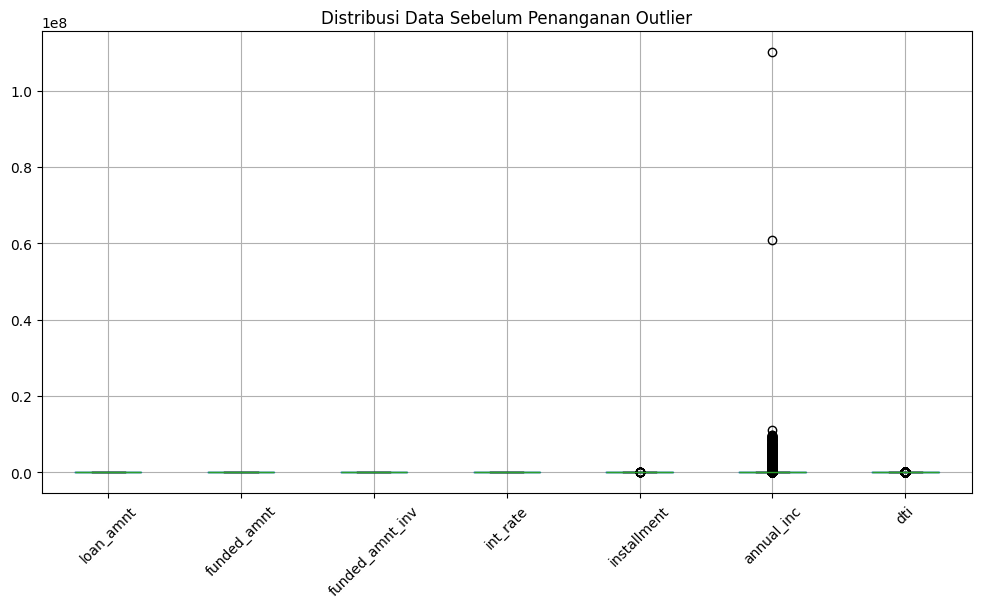

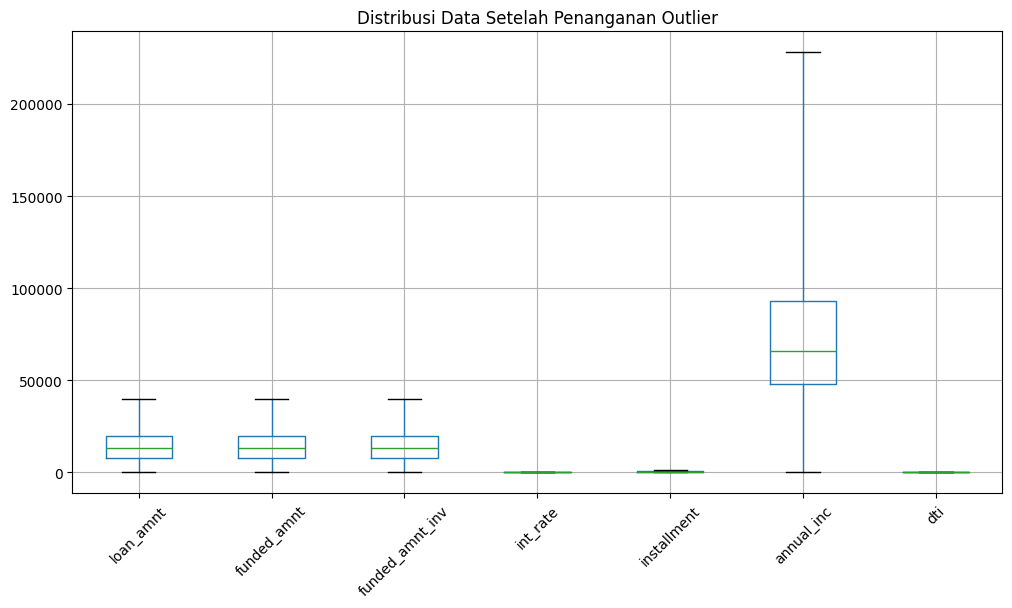

In [17]:
# Visualisasi sebelum penanganan outlier
from matplotlib import pyplot as plt


numeric_cols = df_clean.select_dtypes(include=['int64','float64']).columns
numeric_cols2 = df_final.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(12, 6))
df_clean.boxplot(column=list(numeric_cols), whis=3)
plt.title("Distribusi Data Sebelum Penanganan Outlier")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
df_final.boxplot(column=list(numeric_cols2), whis=3)
plt.title("Distribusi Data Setelah Penanganan Outlier")
plt.xticks(rotation=45)
plt.show()


Simpan dataset baru

In [18]:
df_final.to_csv("lendingclub_clean.csv", index=False)